<a href="https://colab.research.google.com/github/AmyW418/Fashion-MNIST-CNN/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Train and predict a CNN model for Fashion MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.python.keras.models import Sequential

In [ ]:
#load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# dictionary to match an int label to its actual string label
item_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

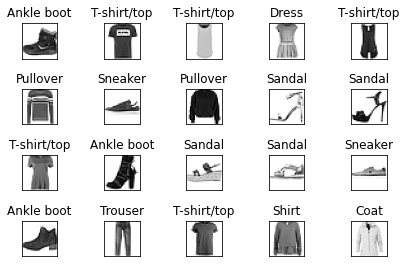

In [ ]:
# show the first 20 images in train along with their respecive labels
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(xtrain[i], cmap=('Greys'))
  plt.title("{}".format(item_labels[ytrain[i]]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
# one hot encode the labels for CNN
num_labels = 10
ytrain = keras.utils.to_categorical(ytrain, num_labels)
ytest = keras.utils.to_categorical(ytest, num_labels)

# change from int to float and /255.0 to standardize
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# Reshape it so it is like a "single line" of bits of the image for CNN input
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2], 1))
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
# Model 1 - basic CNN model, uses three Conv2D layers, MaxPooling in between each, and two Dense layer at the end
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (2, 2), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (2, 2), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
# Compile and fit model 1
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
results1 = model1.fit(xtrain, ytrain, batch_size= 100, epochs = 20, validation_data=(xtest, ytest))

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.4941 - accuracy: 0.8205 - val_loss: 0.3636 - val_accuracy: 0.8647
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3062 - accuracy: 0.8906 - val_loss: 0.2947 - val_accuracy: 0.8933
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2607 - accuracy: 0.9065 - val_loss: 0.2887 - val_accuracy: 0.8974
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2314 - accuracy: 0.9150 - val_loss: 0.2611 - val_accuracy: 0.9053
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2053 - accuracy: 0.9246 - val_loss: 0.2450 - val_accuracy: 0.9136
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1874 - accuracy: 0.9311 - val_loss: 0.2541 - val_accuracy: 0.9069
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1701 - accuracy: 0.9365 - val_loss: 0.2360 - val_accuracy: 0.9161
Epoch 

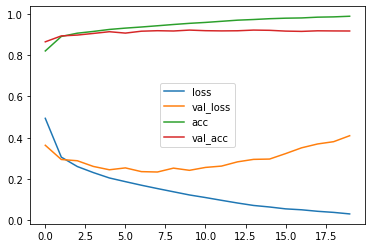

In [ ]:
# Plot loss and accuracy functions for Model 1
plt.plot(results1.history['loss'], label='loss')
plt.plot(results1.history['val_loss'], label='val_loss')
plt.plot(results1.history['accuracy'], label='acc')
plt.plot(results1.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Get the loss and accuracy of model 1
score = model1.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4098943769931793
Test accuracy: 0.9171000123023987


In [ ]:
model1.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 5, 5, 128)         32896     
_________________________________________________________________
flatten_57 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 128)             

In [ ]:
# While building model 1, tested multiple different numbers for kernel size, dense layer size, batch size and number or epochs
# Model worked better for larger dense layer sizes, but the amount of total params was extremely big
# Just based on accuracy the current numbers seem to work the best
# From plot for model 1, we can see that model 1 over fits the training data
# The loss function for validation data starts increasing and differs a lot from training loss function
# For model 2, Dropout is used to fix the over fitting

In [ ]:
# Model 2 - Same layers as model 1 but with added Dropout Layers
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (2, 2), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (2, 2), activation='relu'))
model2.add(Flatten())
model2.add(Dropout(0.15))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dropout(0.30))
model2.add(Dense(10, activation='softmax'))

In [ ]:
# compile model 2
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
results2 = model2.fit(xtrain, ytrain, batch_size= 100, epochs = 20, validation_data=(xtest, ytest))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6145 - accuracy: 0.7769 - val_loss: 0.3817 - val_accuracy: 0.8617
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3898 - accuracy: 0.8627 - val_loss: 0.3156 - val_accuracy: 0.8846
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3395 - accuracy: 0.8777 - val_loss: 0.2961 - val_accuracy: 0.8904
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3081 - accuracy: 0.8892 - val_loss: 0.2774 - val_accuracy: 0.9015
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2853 - accuracy: 0.8966 - val_loss: 0.2615 - val_accuracy: 0.9044
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2663 - accuracy: 0.9039 - val_loss: 0.2495 - val_accuracy: 0.9117
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2538 - accuracy: 0.9089 - val_loss: 0.2458 - val_accuracy: 0.9116
Epoch 

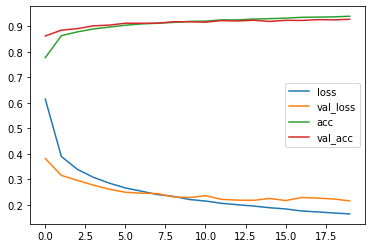

In [ ]:
# plot loss and accuracy functions for model 2
plt.plot(results2.history['loss'], label='loss')
plt.plot(results2.history['val_loss'], label='val_loss')
plt.plot(results2.history['accuracy'], label='acc')
plt.plot(results2.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Get the loss and accuracy of model 2
score = model2.evaluate(xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21584896743297577
Test accuracy: 0.9272000193595886


In [ ]:
model2.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_220 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 5, 5, 128)         32896     
_________________________________________________________________
flatten_73 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dropout_216 (Dropout)        (None, 3200)            

In [ ]:
# Tried multiple different layers and p values for dropout. Current numbers seem to work the best.
# As seen from the plot of the loss and accuracy functions, the validation loss function is no longer growing like crazy
# The accuracy of the model on validation data has also increased by 1%, also showing less overfitting

In [ ]:
# I had also created a model 3 to test Batch Normalization Layer. 
# Combining Batch Normalization with model 2 and model 1, I did not get good results
# The loss function was very sporadic, jumping up and down, and so I got rid of it

# I also tried compiling with SGD instead of Adam. Accuracy decreased to around 86%.

In [ ]:
# Get predicted array from model and get indexes of the ones that were labeled incorrectly by the model
predicted_test = model2.predict_classes(xtest)
ytest = np.argmax(ytest, axis=1) # reverse to_categorical / change one hot encoding back to just and integer
incorrect = np.nonzero(predicted_test!=ytest)[0] 

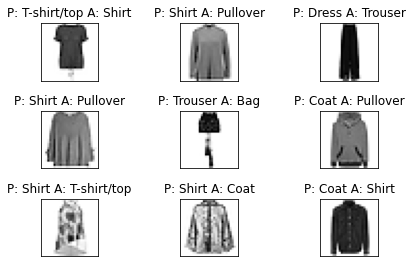

In [ ]:
# randomly print out nine incorrectly labeled images along with theiir predicted labels and actual labels
for i in range(9):
  index = np.random.choice(incorrect)
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(xtest[index].reshape(28, 28), cmap=('Greys'))
  plt.title('P: %s A: %s' % (item_labels[predicted_test[index]], item_labels[ytest[index]]));
  plt.xticks([])
  plt.yticks([])
plt.show()